# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

# TODO Check image read code on Nimble box

In [2]:
import numpy as np
import os
import skimage
#from scipy.misc import imread, imresize
import datetime
import os
import pandas as pd

We set the random seed so that the results don't vary drastically.

In [3]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.set_random_seed(30)
from matplotlib import pyplot as plt
%matplotlib inline 

Using TensorFlow backend.
/Users/akumar/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akumar/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akumar/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/akumar/opt/anaconda3/lib/python3.7

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [4]:
train_doc = np.random.permutation(open('data/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('data/Project_data/val.csv').readlines())

In [5]:
batch_size = 10 
base_path = 'data/Project_data/'

# Explore Data

In [6]:
def read_data(source):
    df = pd.read_csv(source,header=None)
    df[['folder','name','class']] = df[0].str.split(';',expand=True) 
    return df

In [7]:
def explore_data(source):
    df = read_data(source)
    print(df['class'].value_counts())

In [8]:
## Train data
explore_data(base_path+'train.csv')

1    137
3    137
0    136
2    130
4    123
Name: class, dtype: int64


In [9]:
## Val data
explore_data(base_path+'val.csv')

1    23
2    22
3    21
0    18
4    16
Name: class, dtype: int64


We can see that data is evenly balance across all the classes.

In [10]:
def get_image(folder, index):
    image_name = os.listdir(folder)[index]
    image = skimage.io.imread(folder + "/" + image_name).astype(np.float32)
    return image

In [11]:
def get_image_dimensions(row, source_path):
    y, x, _ = get_image(source_path + row['folder'], 0).shape
    return str(x) + "-" + str(y)

In [12]:
def explore_images(source_file, source_path):
    df = read_data(source_file)
    df['shape'] = df.apply(get_image_dimensions, axis=1, args=[source_path])
    print(df['shape'].value_counts())
    return df

In [13]:
# Exploring Train images
explore_images(base_path+'train.csv',base_path+'train/')

160-120    479
360-360    184
Name: shape, dtype: int64


,0,folder,name,class,shape
0,WIN_20180925_17_08_43_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
1,WIN_20180925_17_18_28_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_18_28_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
2,WIN_20180925_17_18_56_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_18_56_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
3,WIN_20180925_17_19_51_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_19_51_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
4,WIN_20180925_17_20_14_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_20_14_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
...,...,...,...,...,...
658,WIN_20180907_16_38_23_Pro_Thumbs Up_new;Thumbs...,WIN_20180907_16_38_23_Pro_Thumbs Up_new,Thumbs Up_new,4,360-360
659,WIN_20180907_16_41_09_Pro_Thumbs Up_new;Thumbs...,WIN_20180907_16_41_09_Pro_Thumbs Up_new,Thumbs Up_new,4,360-360
660,WIN_20180907_16_42_05_Pro_Thumbs Up_new;Thumbs...,WIN_20180907_16_42_05_Pro_Thumbs Up_new,Thumbs Up_new,4,360-360
661,WIN_20180907_16_42_55_Pro_Thumbs Up_new;Thumbs...,WIN_20180907_16_42_55_Pro_Thumbs Up_new,Thumbs Up_new,4,360-360


In [14]:
# Exploring Val images
explore_images(base_path+'val.csv',base_path+'val/')

160-120    62
360-360    38
Name: shape, dtype: int64


,0,folder,name,class,shape
0,WIN_20180925_17_17_04_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_17_04_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
1,WIN_20180925_17_43_01_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_43_01_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
2,WIN_20180925_18_01_40_Pro_Left_Swipe_new;Left_...,WIN_20180925_18_01_40_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
3,WIN_20180925_18_03_21_Pro_Left_Swipe_new;Left_...,WIN_20180925_18_03_21_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
4,WIN_20180926_16_46_22_Pro_Left_Swipe_new;Left_...,WIN_20180926_16_46_22_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
...,...,...,...,...,...
95,WIN_20180907_15_43_36_Pro_Thumbs Up_new;Thumbs...,WIN_20180907_15_43_36_Pro_Thumbs Up_new,Thumbs Up_new,4,360-360
96,WIN_20180907_15_52_05_Pro_Thumbs Up_new;Thumbs...,WIN_20180907_15_52_05_Pro_Thumbs Up_new,Thumbs Up_new,4,360-360
97,WIN_20180907_15_54_30_Pro_Thumbs Up_new;Thumbs...,WIN_20180907_15_54_30_Pro_Thumbs Up_new,Thumbs Up_new,4,360-360
98,WIN_20180907_16_10_59_Pro_Thumbs Up_new;Thumbs...,WIN_20180907_16_10_59_Pro_Thumbs Up_new,Thumbs Up_new,4,360-360


We can see there are two dimensions of the images **160*120** and **360*360**. We will need to use bring the images to same dimension when passing from generator.

## We can see that some of the images are of 120 in y dimension. So we will center crop all the image in 120X120 dimension.

In [15]:
image_shape = (120, 120)

In [16]:
def resize_image(image):
    return skimage.transform.resize(image, image_shape)

In [17]:
def crop(image):
    return image[0:120, 20:140]

In [18]:
def modify_image(image):
    if (image.shape[0] == image.shape[1]):
        return resize_image(image)
    else:
        return crop(image)

In [19]:
def crop_center(img, cropx, cropy):
    print(img.shape)
    y, x, _ = img.shape
    startx = x // 2 - (cropx // 2)
    starty = y // 2 - (cropy // 2)
    return img[starty:starty + cropy, startx:startx + cropx]

160-120    479
360-360    184
Name: shape, dtype: int64


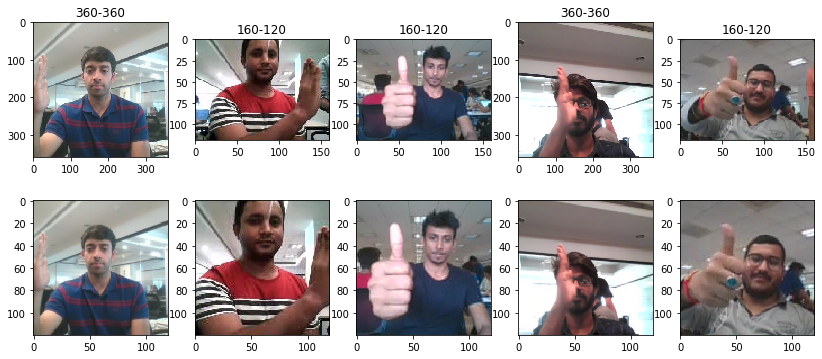

In [20]:
sample_size = 5
df = explore_images(base_path + 'train.csv', base_path + 'train/')
sample = df.sample(n=sample_size)
fig, axs = plt.subplots(2, 5, figsize=(14, 6))
plot_index = 1
for index, row in sample.head(n=sample_size).iterrows():
    image = get_image(base_path + 'train/' + row['folder'], 5)
    plt.subplot(2, 5, plot_index, title=row['shape'])
    plt.imshow(image.astype('uint8'), interpolation='nearest')
    plt.subplot(2, 5, plot_index + sample_size)
    image = modify_image(image)
    plt.imshow(image.astype('uint8'), interpolation='nearest')
    plot_index += 1

plt.show()

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [21]:
list_of_number_of_images_per_video = list(range(4, 20))
train_path = base_path + 'train'
val_path = base_path + 'val'

In [22]:
def nomalize(array):
    return (array - array.min()) / (array.max() - array.min())

In [23]:
# TODO Refactor this method to remove duplicate and pass flag to append image to processedImages
processedImages = []

def generator(source_path, folder_list, batch_size, test_generator = False):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = list_of_number_of_images_per_video #create a list of image numbers you want to use for a particular video
    t = np.random.permutation(folder_list)
    num_batches = len(t)//batch_size# calculate the number of batches
    if test_generator:
        print("Number of batches ",num_batches)
    for batch in range(num_batches): # we iterate over the number of batches
        if test_generator:
            print("Executing batch ", batch)
        batch_data = np.zeros((batch_size,len(img_idx),image_shape[0],image_shape[1],3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
        batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
        for folder in range(batch_size): # iterate over the batch_size
            if test_generator:
                print("Executing folder ", folder)
            imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
            for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                if test_generator:
                    processedImages.append(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+"_"+str(item))
                image = get_image(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0],item)
               
                #Here, we are croping and resizing the image based on its dimensions
                image = modify_image(image)

                #crop the images and resize them. Note that the images are of 2 different shape 
                #and the conv3D will throw error if the inputs in a batch have different shapes
                image = image.astype('float64')
                batch_data[folder,idx,:,:,0] = nomalize(image[:,:,0]) #normalise and feed in the image
                batch_data[folder,idx,:,:,1] = nomalize(image[:,:,1])#normalise and feed in the image
                batch_data[folder,idx,:,:,2] = nomalize(image[:,:,2])#normalise and feed in the image

            batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
    
    remaining_folder = len(t)%batch_size
    batch_data = np.zeros((remaining_folder,len(img_idx),image_shape[0],image_shape[1],3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
    batch_labels = np.zeros((remaining_folder,5)) # batch_labels is the one hot representation of the output
    if remaining_folder >0:
        if test_generator:
            print("Executing last batch ")
        for folder in range(remaining_folder): # iterate over the batch_size
            if test_generator:
                print("Executing folder ", folder)
            imgs = os.listdir(source_path+'/'+ t[folder + (num_batches * batch_size)].split(';')[0]) # read all the images in the folder
            for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                if test_generator:
                    processedImages.append(source_path+'/'+ t[folder + (num_batches * batch_size)].strip().split(';')[0]+"_"+str(item))
                image = get_image(source_path+'/'+ t[folder + (num_batches * batch_size)].strip().split(';')[0],item)

                #Here, we are croping and resizing the image based on its dimensions
                image = modify_image(image)

                #crop the images and resize them. Note that the images are of 2 different shape 
                #and the conv3D will throw error if the inputs in a batch have different shapes
                image = image.astype('float64')
                batch_data[folder,idx,:,:,0] = nomalize(image[:,:,0]) #normalise and feed in the image
                batch_data[folder,idx,:,:,1] = nomalize(image[:,:,1])#normalise and feed in the image
                batch_data[folder,idx,:,:,2] = nomalize(image[:,:,2])#normalise and feed in the image

            batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
        yield batch_data, batch_labels

        # write the code for the remaining data points which are left after full batches


# Testing image generator

In [24]:
train_generator = generator(val_path, val_doc, batch_size,True)

In [25]:
total_images = len(val_doc) * len(list_of_number_of_images_per_video)
image_count = 0
for data in train_generator:
    print(data[0].shape)
    print(data[1].shape)
    image_count += data[0].shape[0]*data[0].shape[1]
    
print(image_count)
print(total_images)
print(len(processedImages) )
assert len(processedImages) == len(set(processedImages)), "the generator did not return all the images"
assert image_count == total_images, "the generator did not return all the images"

Source path =  data/Project_data/val ; batch size = 10
Number of batches  10
Executing batch  0
Executing folder  0
Executing folder  1
Executing folder  2
Executing folder  3
Executing folder  4
Executing folder  5
Executing folder  6
Executing folder  7
Executing folder  8
Executing folder  9
(10, 16, 120, 120, 3)
(10, 5)
Executing batch  1
Executing folder  0
Executing folder  1
Executing folder  2
Executing folder  3
Executing folder  4
Executing folder  5
Executing folder  6
Executing folder  7
Executing folder  8
Executing folder  9
(10, 16, 120, 120, 3)
(10, 5)
Executing batch  2
Executing folder  0
Executing folder  1
Executing folder  2
Executing folder  3
Executing folder  4
Executing folder  5
Executing folder  6
Executing folder  7
Executing folder  8
Executing folder  9
(10, 16, 120, 120, 3)
(10, 5)
Executing batch  3
Executing folder  0
Executing folder  1
Executing folder  2
Executing folder  3
Executing folder  4
Executing folder  5
Executing folder  6
Executing folder 

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [26]:
curr_dt_time = datetime.datetime.now()
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 1# choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 1


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [27]:
input_shape = (len(list_of_number_of_images_per_video), image_shape[0],
               image_shape[1], 3)

In [28]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers

model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='softmax'))

#write your model here

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [29]:
print (model.summary())
optimiser = optimizers.Adam(lr=0.01)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 14, 118, 118, 32)  2624      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 7, 59, 59, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 5, 57, 57, 64)     55360     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 2, 28, 28, 64)     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [30]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [31]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR =  ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [32]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [ ]:
history= model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)


Source path =  data/Project_data/val ; batch size = 10
Source path =  data/Project_data/train ; batch size = 10
Epoch 1/1
